## Reading the data set

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

train = pd.read_csv('/Users/EvanCallaghan/Documents/Data_Science_Group/Analytics_Data_Science/Forecasting_Traffic_Flow/Data/train.csv')
test = pd.read_csv('/Users/EvanCallaghan/Documents/Data_Science_Group/Analytics_Data_Science/Forecasting_Traffic_Flow/Data/test.csv')

train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


## Variable engineering

In [50]:
## Puting time in the right format 
train['time'] = pd.to_datetime(train['time'], format = '%Y-%m-%d %H:%M:%S')
test['time'] = pd.to_datetime(test['time'], format = '%Y-%m-%d %H:%M:%S')

## Extracting day, hour and minute
train['day'] = train['time'].dt.dayofweek
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute

test['day'] = test['time'].dt.dayofweek
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute

## Changing direction to dummies
train = pd.concat([train, pd.get_dummies(train['direction'])], axis = 1)
test = pd.concat([test, pd.get_dummies(train['direction'])], axis = 1)

## Exploratory Analysis

In [51]:
train.shape

(848835, 17)

In [52]:
test.shape

(848835, 16)

In [53]:
train['x'].value_counts()

2    339534
1    287298
0    222003
Name: x, dtype: int64

In [54]:
train['y'].value_counts()

3    235062
2    235062
1    208944
0    169767
Name: y, dtype: int64

In [55]:
train['direction'].value_counts()

EB    156708
SB    156708
NB    156708
WB    143649
NE     91413
SW     91413
SE     26118
NW     26118
Name: direction, dtype: int64

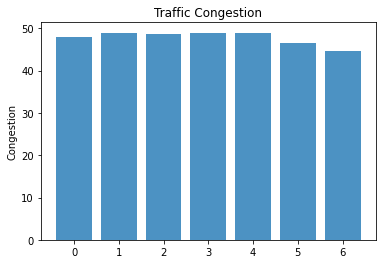

In [66]:
days = train.groupby('day')['congestion'].mean()

plt.bar(days.index, days.values, align='center', alpha=0.8)
plt.ylabel('Congestion')
plt.title('Traffic Congestion')
plt.show()

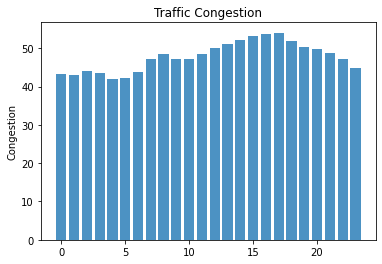

In [67]:
hours = train.groupby('hour')['congestion'].mean()

plt.bar(hours.index, hours.values, align='center', alpha=0.8)
plt.ylabel('Congestion')
plt.title('Traffic Congestion')
plt.show()

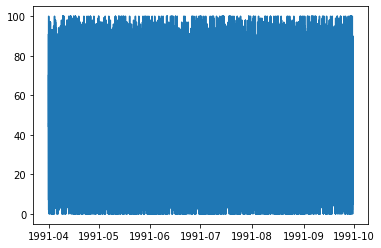

In [70]:
plt.plot(train['time'], train['congestion'])
plt.show()